In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

location = "DC_Properties.csv"
dc_df = pd.read_csv(location)
dc_df.head (5) #print x first rows



C:\Users\nikil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [2]:
#print columns
dc_df.columns


Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [9]:
#158957 rows / 49 columns / detect missing values on columns / identify variable types
dc_df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [3]:
dc_df.describe()
#bathroom ranges from 0 thru 14
#easily see columns w/ missing values -see Count row-


,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [4]:
# see what data is missing
total = dc_df.isnull().sum().sort_values(ascending=False)
percent_1 = dc_df.isnull().sum()/dc_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)



C:\Users\nikil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Total,%
AC,0,0.0
ASSESSMENT_NBHD,1,0.0
ASSESSMENT_SUBNBHD,32551,20.5
AYB,271,0.2
BATHRM,0,0.0
BEDRM,0,0.0
BLDG_NUM,0,0.0
CENSUS_BLOCK,52906,33.3
CENSUS_TRACT,1,0.0
CITY,52906,33.3


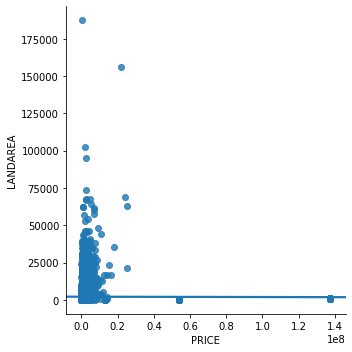

In [5]:
sns.lmplot(x='PRICE', y='LANDAREA', data=dc_df)

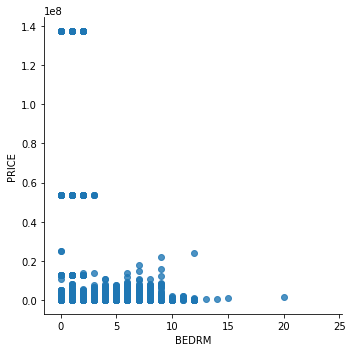

In [10]:
#add more details to scatterplot

sns.lmplot(x='BEDRM', y='PRICE', data=dc_df, 
           fit_reg=False, #remove regression line
           )   #color by evolution stage

In [ ]:
# change size of plot
# play around with the numbers to see how the plot changes
plt.subplots(figsize=(4,4))

# violin plot shows the distribution of attack power for each type

# sns = referring to the seaborn library nickname
# violinplot = violin plot reference
# data = the name of the dataset you are pulling from
# x = variable along the x-axis, y = variable along the y-axis 

sns.violinplot(x='GRADE', y='YR_RMDL', data=dc_df)

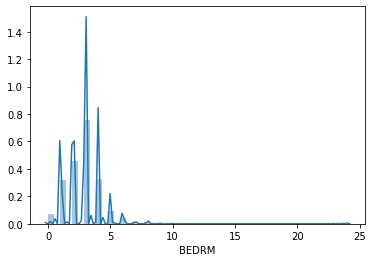

In [11]:
sns.distplot(dc_df['BEDRM'])

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
plt.figure(figsize=(15,5))

# BAR PLOT
# Plots two variables - one numeric, one categorical

sns.barplot(x = 'PRICE', y = 'STORIES', 
            data=dc_df, palette=pkmn_type_colors)

plt.xticks(rotation=-45) # rotate the labels at the bottom of the graph 

plt.title('Attack Stat by Pokemon Type') # give the plot a title

In [ ]:
plt.figure(figsize=(5,5))

# BAR PLOT
# Plots two variables - one numeric, one categorical

sns.barplot(x = 'PRICE', y = 'STORIES', 
            data=dc_df)

#plt.xticks(rotation=-45) # rotate the labels at the bottom of the graph 

plt.title('Attack Stat by Pokemon Type') # give the plot a title